<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description:" data-toc-modified-id="Data-Description:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description:</a></span></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Data Description:

- dswrf_sfc_wm2:      net downward shortwave radiation flux, W m-2
- gust_sfc_ms:        wind gust (peak? 3s mean? 1 min mean?) surface (what does surface mean? 2m?) in meters per second
- hpbl_sfc_m:         Planetary boundary layer height in meters
- msl_ms_pa:          Mean Sea Level Pressure (Standard Atmosphere Reduction)
- pottemp_80mto0m_K:  Potential Temperature in 80m, reduced (dynamic reference level? sfc pressure? not 1000 hPa)
- q_2m_1:             Specific Humidity in 2m (g/kg ?!)
- q_pfg30_1:          Specific Humidity in (30m ??) slightly above 100m  (g/kg ?!)
- r_pl925_%:          Relative Humidity in p=925 hPa level (in %)
- r_pl950_%:          Relative Humidity in p=950 hPa level (in %)
- shtfl_sfc_wm2:      Sensible heat net flux in W/m^2
- t_100m_k:           Temperature in 100m in Kelvin
- t_2m_k:             Temperature in 2m in Kelvin
- t_pfg30_k:          Temperature in (30m ??) slightly above 100m (in Kelvin)
- tcclow_sfc_%:       Total Cloud Cover, Low Level Clouds (obsvered from Surface?!) in %
- tccmedium_sfc_%:    Total Cloud Cover, Mid Level Clouds (observed from Surface?!) in %
- wdir_100m_dn:       Wind Direction in 100m (in Degrees)
- wdir_10m_dn:        Wind Direction in 10m (in Degrees)
- wdir_pfg30_dn:      Wind Direction in (30m?!) slightly above 100m (in Degrees)
- wdir_pl925_dn:      Wind Direction in 925 hPa Pressure Level (in Degrees)
- wsp_100m_ms:        Wind Speed in 100m (in Degrees)
- wsp_10m_ms:         Wind Speed in 10m (in Degrees)
- wsp_pfg30_ms:       Wind Speed in ... m ?slightly above 100m, values are slightly higher than 100m (in Degrees)
- wsp_pl925_ms:       Wind Speed in 925 hPa Pressure Level (in Degrees)
- created_on:         Data created on
- azimuth:            Azimuth Angle, Solar Altitude
- elevation:          Elevation Angle, Solar Altitude (>0° 'Daytime', <0° 'Nighttime')

In [3]:
with open('obs_20180101_20190625_03_final_normed.p', 'rb') as f1:
    loaded1 = pickle.load(f1, encoding='latin1')

In [4]:
loaded1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70710 entries, 2018-01-01 00:00:00+01:00 to 2019-06-25 01:50:00+02:00
Data columns (total 3 columns):
power_mw_obsnorm              70710 non-null float64
power_available_mw_obsnorm    70710 non-null float64
target_losses_norm            70710 non-null float64
dtypes: float64(3)
memory usage: 2.2 MB


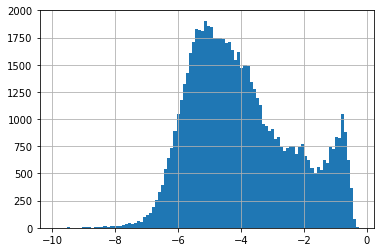

In [10]:
np.log(loaded1[loaded1.target_losses_norm > 10e-20].target_losses_norm).hist(bins=100)
plt.show()

In [13]:
np.exp(-4)

0.01831563888873418

In [5]:
loaded1.head()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 00:00:00+01:00,0.330269,0.450934,0.120665
2018-01-01 00:10:00+01:00,0.339204,0.457539,0.118335
2018-01-01 00:20:00+01:00,0.336993,0.456577,0.119584
2018-01-01 00:30:00+01:00,0.337858,0.462447,0.124589
2018-01-01 00:40:00+01:00,0.353646,0.483538,0.129892


In [6]:
loaded1.describe()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
count,70710.000000,70710.000000,70710.000000
mean,0.204310,0.274691,0.070381
std,0.162364,0.264172,0.128426
min,0.000000,0.000073,0.000049
25%,0.065503,0.074167,0.005369
50%,0.166234,0.181165,0.014100
75%,0.320650,0.391951,0.056041
max,0.801717,1.019565,0.779721


In [7]:
with open('griddata_gfs_us_20180101_20190826_03_final.p', 'rb') as f2:
    loaded2 = pickle.load(f2, encoding='latin1')

In [8]:
loaded2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14378 entries, 2018-01-01 06:00:00+00:00 to 2019-08-26 18:00:00+00:00
Data columns (total 26 columns):
dswrf_sfc_wm2        14378 non-null float64
gust_sfc_ms          14378 non-null float64
hpbl_sfc_m           14378 non-null float64
msl_ms_pa            14378 non-null float64
pottemp_80mto0m_K    14378 non-null float64
q_2m_1               14378 non-null float64
q_pfg30_1            14378 non-null float64
r_pl925_%            14378 non-null float64
r_pl950_%            14378 non-null float64
shtfl_sfc_wm2        14378 non-null float64
t_100m_k             14378 non-null float64
t_2m_k               14378 non-null float64
t_pfg30_k            14378 non-null float64
tcclow_sfc_%         14378 non-null float64
tccmedium_sfc_%      14378 non-null float64
wdir_100m_dn         14378 non-null float64
wdir_10m_dn          14378 non-null float64
wdir_pfg30_dn        14378 non-null float64
wdir_pl925_dn        14378 non-null float64
wsp_100m

In [47]:
loaded2.head(30).T

index,2018-01-01 06:00:00+00:00,2018-01-01 07:00:00+00:00,2018-01-01 08:00:00+00:00,2018-01-01 09:00:00+00:00,2018-01-01 10:00:00+00:00,2018-01-01 11:00:00+00:00,2018-01-01 12:00:00+00:00,2018-01-01 13:00:00+00:00,2018-01-01 14:00:00+00:00,2018-01-01 15:00:00+00:00,...,2018-01-02 02:00:00+00:00,2018-01-02 03:00:00+00:00,2018-01-02 04:00:00+00:00,2018-01-02 05:00:00+00:00,2018-01-02 06:00:00+00:00,2018-01-02 07:00:00+00:00,2018-01-02 08:00:00+00:00,2018-01-02 09:00:00+00:00,2018-01-02 10:00:00+00:00,2018-01-02 11:00:00+00:00
dswrf_sfc_wm2,0,0,0,30,70,112.5,97.5,80,60,25,...,0,0,0,0,0,0,0,30,130,140
gust_sfc_ms,16.777,16.6067,16.7506,16.6537,16.143,15.5832,15.4986,15.042,14.2524,13.3505,...,5.85,5.99176,6.23453,6.95,8.65762,8.88901,8.90828,9.22939,9.31316,8.91293
hpbl_sfc_m,1349.93,1352.62,1385.88,1406.32,1413.33,1438.09,1464.67,1429.92,1307.31,1061.04,...,174.423,168.772,176.411,195.451,253.925,262.206,253.326,320.478,535.905,748.51
msl_ms_pa,99212.1,99259.8,99340,99435.7,99523.7,99586.8,99658,99670.6,99673.8,99676.5,...,99915.3,99960.2,100010,100066,100198,100263,100346,100434,100508,100571
pottemp_80mto0m_K,0.559356,0.528755,0.519516,0.462775,0.395166,0.23532,0.202019,0.26923,0.43336,0.682842,...,1.33606,1.41025,1.50428,1.53681,1.44517,1.55736,1.63175,1.21258,0.580091,0.225906
q_2m_1,0.005105,0.005005,0.004875,0.0046925,0.0046175,0.0045825,0.0045775,0.004615,0.0046625,0.00469,...,0.00466719,0.0047325,0.00478075,0.004811,0.0047685,0.0047585,0.00471865,0.0048475,0.00501649,0.0050525
q_pfg30_1,0.00485236,0.0047388,0.00460083,0.00439475,0.0043218,0.00427992,0.00428204,0.00432967,0.00440051,0.00447851,...,0.00469632,0.00479315,0.0048581,0.00488861,0.00490477,0.00489199,0.00485927,0.00485942,0.00487916,0.00484522
r_pl925_%,89.975,89.25,88.35,85.4,85.275,85.825,86.45,86.8,87.4,89.125,...,93.025,90.775,88.375,87.75,91.275,92.125,92.4,92.5445,93.2,95.1134
r_pl950_%,83.075,82.25,81.475,78.575,78.3,78.725,79.225,79.7,80.325,81.975,...,93.5,92.575,90.375,89.275,93.5,92.975,92.375,92.0945,93.3,94.3634
shtfl_sfc_wm2,-58.4449,-59.1278,-60.1742,-61.3762,-50.7118,-32.2492,-24.1271,-27.1222,-35.9227,-50.3045,...,-22.6126,-21.6926,-22.9009,-24.7614,-31.0487,-35.2903,-37.2821,-34.4399,-21.3691,-10.8974


In [44]:
loaded2.describe().T

,count,mean,std,min,25%,50%,75%,max
dswrf_sfc_wm2,14378.0,155.029194,230.147722,0.000000,0.000000,15.000000,248.750000,885.500000
gust_sfc_ms,14378.0,7.943250,4.061036,0.517106,4.683080,7.678551,10.631585,24.316044
hpbl_sfc_m,14378.0,549.354510,427.125419,21.333019,199.087539,451.845422,821.578707,2519.267852
msl_ms_pa,14378.0,101512.216593,996.863087,97637.887500,100968.224375,101567.477500,102143.115625,104261.237500
pottemp_80mto0m_K,14378.0,0.742688,1.175120,-2.431875,-0.136376,0.631883,1.514157,4.514006
q_2m_1,14378.0,0.006481,0.002735,0.000993,0.004248,0.006143,0.008523,0.016743
q_pfg30_1,14378.0,0.006165,0.002540,0.000939,0.004075,0.005920,0.008049,0.014403
r_pl925_%,14378.0,75.716828,18.950255,2.400000,64.625000,79.475000,90.793750,100.000000
r_pl950_%,14378.0,75.737091,17.724822,2.425000,64.718129,78.600000,89.643750,100.000000
shtfl_sfc_wm2,14378.0,6.316193,71.012102,-115.227905,-36.246123,-20.870140,24.313370,372.421576


In [46]:
6*24*550

79200

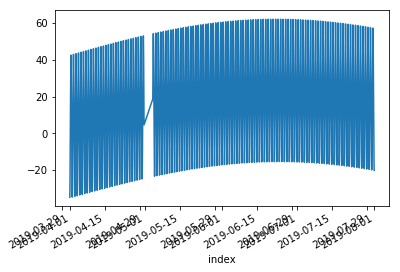

In [63]:
#loaded2.elevation.loc[:].plot()
loaded2.elevation.loc['2019-4':'2019-07'].plot()
plt.show()

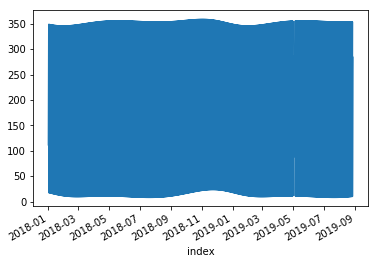

In [49]:
loaded2.azimuth.plot()
plt.show()

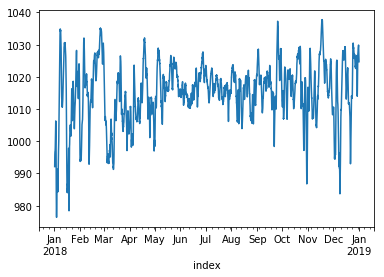

In [71]:
loaded2.msl_ms_pa['2018'].div(100).plot()
plt.show()

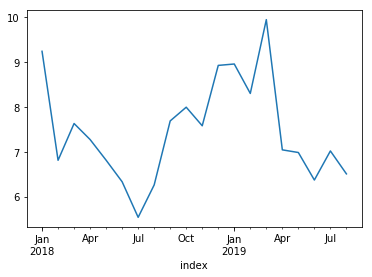

In [75]:
loaded2.wsp_100m_ms.resample('M').mean().plot()
plt.show()

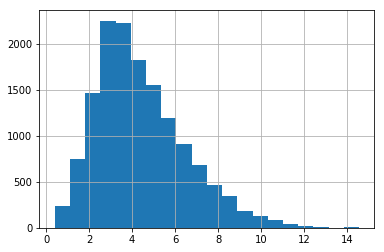

In [78]:
loaded2.wsp_10m_ms.hist(bins=20)
plt.show()

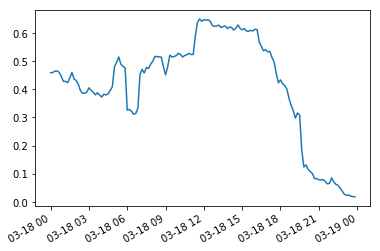

In [349]:
loaded1.target_losses_norm['2018-3-18'].plot()
plt.show()

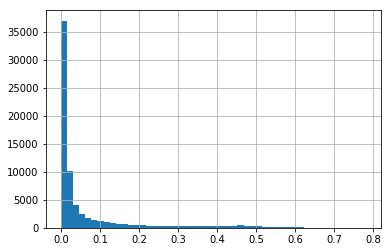

In [109]:
loaded1.target_losses_norm.hist(bins=50)
plt.show()

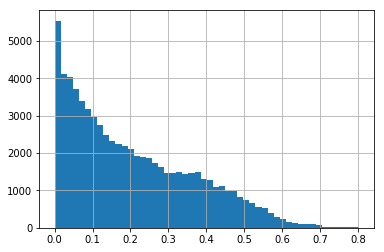

In [107]:
loaded1.power_mw_obsnorm.hist(bins=50)
plt.show()

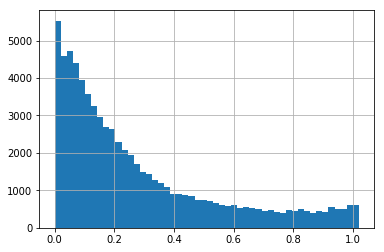

In [108]:
loaded1.power_available_mw_obsnorm.hist(bins=50)
plt.show()

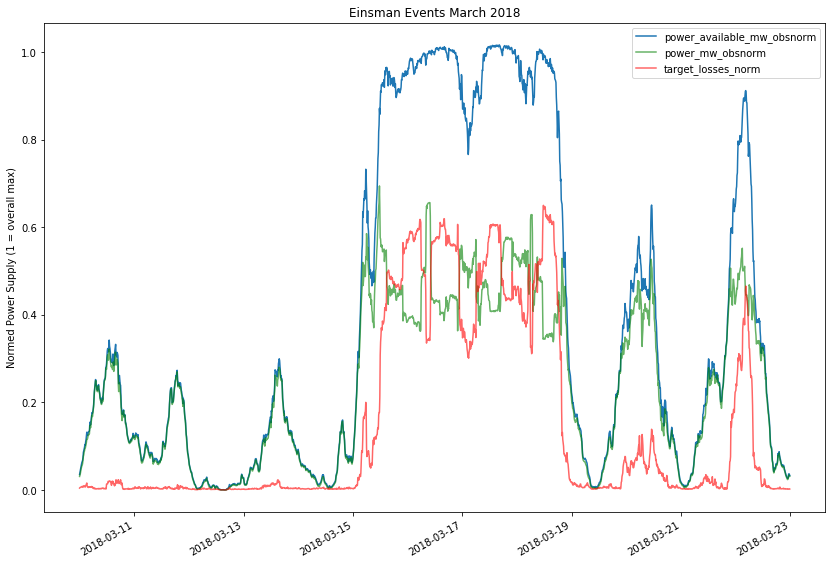

In [165]:
plt.figure(figsize=(14,10))
loaded1.power_available_mw_obsnorm['2018-3-10':'2018-3-22'].plot()
loaded1.power_mw_obsnorm['2018-3-10':'2018-3-22'].plot(c='g', alpha=0.6)
loaded1.target_losses_norm['2018-3-10':'2018-3-22'].plot(c='r', alpha=0.6)
plt.legend()
plt.title('Einsman Events March 2018')
plt.ylabel('Normed Power Supply (1 = overall max)')
plt.show()

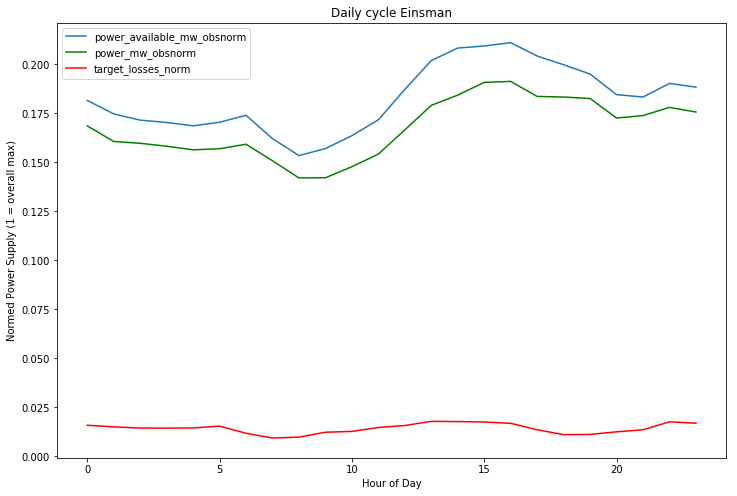

In [163]:
mean_daily_cycle = loaded1.groupby(loaded1.index.hour).median()
plt.figure(figsize=(12,8))
mean_daily_cycle.power_available_mw_obsnorm.plot()
mean_daily_cycle.power_mw_obsnorm.plot(c='g')
mean_daily_cycle.target_losses_norm.plot(c='r')
plt.legend()
plt.title('Daily cycle Einsman')
plt.xlabel('Hour of Day')
plt.ylabel('Normed Power Supply (1 = overall max)')
plt.show()

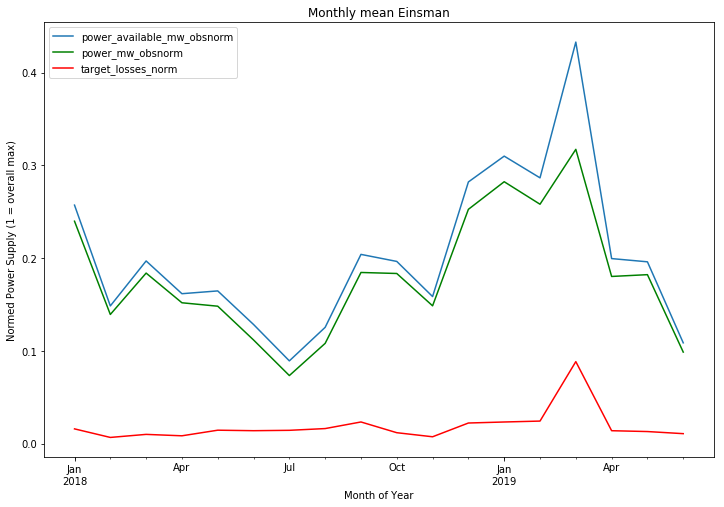

In [162]:
#mean_monthly_cycle = loaded1.groupby(loaded1.index.month).median()
mean_monthly_cycle = loaded1.resample('M').median()
plt.figure(figsize=(12,8))
mean_monthly_cycle.power_available_mw_obsnorm.plot()
mean_monthly_cycle.power_mw_obsnorm.plot(c='g')
mean_monthly_cycle.target_losses_norm.plot(c='r')
plt.legend()
plt.title('Monthly mean Einsman')
plt.xlabel('Month of Year')
plt.ylabel('Normed Power Supply (1 = overall max)')
plt.show()

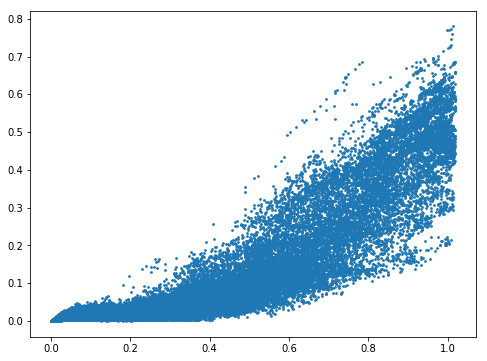

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(loaded1.power_available_mw_obsnorm, loaded1.target_losses_norm, s=3)
plt.show()

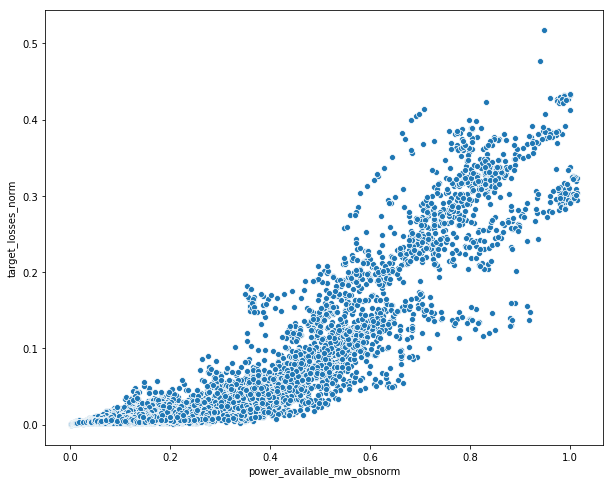

In [181]:
plt.figure(figsize=(10,8))
#sns.scatterplot(x='power_available_mw_obsnorm', y='target_losses_norm', hue=loaded1.index.month, data=loaded1)
sns.scatterplot(x='power_available_mw_obsnorm', y='target_losses_norm', 
                data=loaded1[loaded1.index.month.isin([11,12])])
plt.show()

In [240]:
march2518 = loaded1['2018-03-31']
print(len(march2518.index))
march2518.index[-20:]

# switch to summer time: 25th (one hour "missing", 138 values)
# other days before and after are complete (144 values)
# but!! : 31st: one value missing !!! 23:50:00 not present !!!

143


DatetimeIndex(['2018-03-31 20:30:00+02:00', '2018-03-31 20:40:00+02:00',
               '2018-03-31 20:50:00+02:00', '2018-03-31 21:00:00+02:00',
               '2018-03-31 21:10:00+02:00', '2018-03-31 21:20:00+02:00',
               '2018-03-31 21:30:00+02:00', '2018-03-31 21:40:00+02:00',
               '2018-03-31 21:50:00+02:00', '2018-03-31 22:00:00+02:00',
               '2018-03-31 22:10:00+02:00', '2018-03-31 22:20:00+02:00',
               '2018-03-31 22:30:00+02:00', '2018-03-31 22:40:00+02:00',
               '2018-03-31 22:50:00+02:00', '2018-03-31 23:00:00+02:00',
               '2018-03-31 23:10:00+02:00', '2018-03-31 23:20:00+02:00',
               '2018-03-31 23:30:00+02:00', '2018-03-31 23:40:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [195]:
march2518_2 = loaded2['2018-03-25']
print(len(march2518_2.index))
march2518_2.index[:20]

24


DatetimeIndex(['2018-03-25 00:00:00+00:00', '2018-03-25 01:00:00+00:00',
               '2018-03-25 02:00:00+00:00', '2018-03-25 03:00:00+00:00',
               '2018-03-25 04:00:00+00:00', '2018-03-25 05:00:00+00:00',
               '2018-03-25 06:00:00+00:00', '2018-03-25 07:00:00+00:00',
               '2018-03-25 08:00:00+00:00', '2018-03-25 09:00:00+00:00',
               '2018-03-25 10:00:00+00:00', '2018-03-25 11:00:00+00:00',
               '2018-03-25 12:00:00+00:00', '2018-03-25 13:00:00+00:00',
               '2018-03-25 14:00:00+00:00', '2018-03-25 15:00:00+00:00',
               '2018-03-25 16:00:00+00:00', '2018-03-25 17:00:00+00:00',
               '2018-03-25 18:00:00+00:00', '2018-03-25 19:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='index', freq=None)

In [220]:
october2818 = loaded1['2018-10-27':'2018-11-01']
print(len(october2818.index))
october2818.index[:20]
october2818.index[130:150]
# switch to standard time: 28th
# 27th: all data present
# 28th: data only until 1:50:00
# 29th and 30th: missing completely
# 31st: data only for 23:50:00 (one single value)
# 1st: all data present

301


DatetimeIndex(['2018-10-27 21:40:00+02:00', '2018-10-27 21:50:00+02:00',
               '2018-10-27 22:00:00+02:00', '2018-10-27 22:10:00+02:00',
               '2018-10-27 22:20:00+02:00', '2018-10-27 22:30:00+02:00',
               '2018-10-27 22:40:00+02:00', '2018-10-27 22:50:00+02:00',
               '2018-10-27 23:00:00+02:00', '2018-10-27 23:10:00+02:00',
               '2018-10-27 23:20:00+02:00', '2018-10-27 23:30:00+02:00',
               '2018-10-27 23:40:00+02:00', '2018-10-27 23:50:00+02:00',
               '2018-10-28 00:00:00+02:00', '2018-10-28 00:10:00+02:00',
               '2018-10-28 00:20:00+02:00', '2018-10-28 00:30:00+02:00',
               '2018-10-28 00:40:00+02:00', '2018-10-28 00:50:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [241]:
march3119 = loaded1['2019-03-27':'2019-04-01']
print(len(march3119.index))
march3119.index[:20]
# switch to summer time: 31st
# 26th: all data present
# 27th: data only until 00:50:00 (six values)
# 28th, 29th, 30th: missing completely
# 31st: data only for 23:50:00 (one single value)
# 1st: all data present

151


DatetimeIndex(['2019-03-27 00:00:00+01:00', '2019-03-27 00:10:00+01:00',
               '2019-03-27 00:20:00+01:00', '2019-03-27 00:30:00+01:00',
               '2019-03-27 00:40:00+01:00', '2019-03-27 00:50:00+01:00',
               '2019-03-31 23:50:00+02:00', '2019-04-01 00:00:00+02:00',
               '2019-04-01 00:10:00+02:00', '2019-04-01 00:20:00+02:00',
               '2019-04-01 00:30:00+02:00', '2019-04-01 00:40:00+02:00',
               '2019-04-01 00:50:00+02:00', '2019-04-01 01:00:00+02:00',
               '2019-04-01 01:10:00+02:00', '2019-04-01 01:20:00+02:00',
               '2019-04-01 01:30:00+02:00', '2019-04-01 01:40:00+02:00',
               '2019-04-01 01:50:00+02:00', '2019-04-01 02:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [258]:
index_count = loaded1.target_losses_norm.resample('D').count()
print(len(index_count))
print(len(index_count[index_count != 144]))
print(len(index_count[index_count == 0]))
index_count[index_count != 144]

541
54
25


2018-01-31 00:00:00+01:00      7
2018-03-25 00:00:00+01:00    138
2018-03-31 00:00:00+02:00    143
2018-04-30 00:00:00+02:00    143
2018-05-31 00:00:00+02:00     13
2018-06-30 00:00:00+02:00     13
2018-07-30 00:00:00+02:00     12
2018-07-31 00:00:00+02:00      1
2018-08-29 00:00:00+02:00     12
2018-08-30 00:00:00+02:00      0
2018-08-31 00:00:00+02:00      1
2018-09-28 00:00:00+02:00     12
2018-09-29 00:00:00+02:00      0
2018-09-30 00:00:00+02:00      1
2018-10-28 00:00:00+02:00     12
2018-10-29 00:00:00+01:00      0
2018-10-30 00:00:00+01:00      0
2018-10-31 00:00:00+01:00      1
2018-11-27 00:00:00+01:00      6
2018-11-28 00:00:00+01:00      0
2018-11-29 00:00:00+01:00      0
2018-11-30 00:00:00+01:00      1
2018-12-27 00:00:00+01:00      6
2018-12-28 00:00:00+01:00      0
2018-12-29 00:00:00+01:00      0
2018-12-30 00:00:00+01:00      0
2018-12-31 00:00:00+01:00      1
2019-01-26 00:00:00+01:00      6
2019-01-27 00:00:00+01:00      0
2019-01-28 00:00:00+01:00      0
2019-01-29

In [286]:
index_count2 = loaded1.power_mw_obsnorm.resample('D').count()
print(len(index_count2))
print(len(index_count2[index_count2 != 144]))
print(sum(index_count2[index_count2 != 144]))
print(len(index_count2[index_count2 == 0]))
index_count2[index_count2 != 144]

541
54
582
25


2018-01-31 00:00:00+01:00      7
2018-03-25 00:00:00+01:00    138
2018-03-31 00:00:00+02:00    143
2018-04-30 00:00:00+02:00    143
2018-05-31 00:00:00+02:00     13
2018-06-30 00:00:00+02:00     13
2018-07-30 00:00:00+02:00     12
2018-07-31 00:00:00+02:00      1
2018-08-29 00:00:00+02:00     12
2018-08-30 00:00:00+02:00      0
2018-08-31 00:00:00+02:00      1
2018-09-28 00:00:00+02:00     12
2018-09-29 00:00:00+02:00      0
2018-09-30 00:00:00+02:00      1
2018-10-28 00:00:00+02:00     12
2018-10-29 00:00:00+01:00      0
2018-10-30 00:00:00+01:00      0
2018-10-31 00:00:00+01:00      1
2018-11-27 00:00:00+01:00      6
2018-11-28 00:00:00+01:00      0
2018-11-29 00:00:00+01:00      0
2018-11-30 00:00:00+01:00      1
2018-12-27 00:00:00+01:00      6
2018-12-28 00:00:00+01:00      0
2018-12-29 00:00:00+01:00      0
2018-12-30 00:00:00+01:00      0
2018-12-31 00:00:00+01:00      1
2019-01-26 00:00:00+01:00      6
2019-01-27 00:00:00+01:00      0
2019-01-28 00:00:00+01:00      0
2019-01-29

In [268]:
loaded1_copy = loaded1.copy()
loaded1_copy.index = loaded1_copy.index.tz_convert('UTC')
loaded1_copy.index

DatetimeIndex(['2017-12-31 23:00:00+00:00', '2017-12-31 23:10:00+00:00',
               '2017-12-31 23:20:00+00:00', '2017-12-31 23:30:00+00:00',
               '2017-12-31 23:40:00+00:00', '2017-12-31 23:50:00+00:00',
               '2018-01-01 00:00:00+00:00', '2018-01-01 00:10:00+00:00',
               '2018-01-01 00:20:00+00:00', '2018-01-01 00:30:00+00:00',
               ...
               '2019-06-24 22:20:00+00:00', '2019-06-24 22:30:00+00:00',
               '2019-06-24 22:40:00+00:00', '2019-06-24 22:50:00+00:00',
               '2019-06-24 23:00:00+00:00', '2019-06-24 23:10:00+00:00',
               '2019-06-24 23:20:00+00:00', '2019-06-24 23:30:00+00:00',
               '2019-06-24 23:40:00+00:00', '2019-06-24 23:50:00+00:00'],
              dtype='datetime64[ns, UTC]', length=70710, freq=None)

In [269]:
loaded1.index

DatetimeIndex(['2018-01-01 00:00:00+01:00', '2018-01-01 00:10:00+01:00',
               '2018-01-01 00:20:00+01:00', '2018-01-01 00:30:00+01:00',
               '2018-01-01 00:40:00+01:00', '2018-01-01 00:50:00+01:00',
               '2018-01-01 01:00:00+01:00', '2018-01-01 01:10:00+01:00',
               '2018-01-01 01:20:00+01:00', '2018-01-01 01:30:00+01:00',
               ...
               '2019-06-25 00:20:00+02:00', '2019-06-25 00:30:00+02:00',
               '2019-06-25 00:40:00+02:00', '2019-06-25 00:50:00+02:00',
               '2019-06-25 01:00:00+02:00', '2019-06-25 01:10:00+02:00',
               '2019-06-25 01:20:00+02:00', '2019-06-25 01:30:00+02:00',
               '2019-06-25 01:40:00+02:00', '2019-06-25 01:50:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=70710, freq=None)

In [271]:
print(loaded1.index[0])
print(loaded1.index[-10:])

2018-01-01 00:00:00+01:00
DatetimeIndex(['2019-06-25 00:20:00+02:00', '2019-06-25 00:30:00+02:00',
               '2019-06-25 00:40:00+02:00', '2019-06-25 00:50:00+02:00',
               '2019-06-25 01:00:00+02:00', '2019-06-25 01:10:00+02:00',
               '2019-06-25 01:20:00+02:00', '2019-06-25 01:30:00+02:00',
               '2019-06-25 01:40:00+02:00', '2019-06-25 01:50:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)


In [272]:
print(loaded1_copy.index[0])
print(loaded1_copy.index[-10:])

2017-12-31 23:00:00+00:00
DatetimeIndex(['2019-06-24 22:20:00+00:00', '2019-06-24 22:30:00+00:00',
               '2019-06-24 22:40:00+00:00', '2019-06-24 22:50:00+00:00',
               '2019-06-24 23:00:00+00:00', '2019-06-24 23:10:00+00:00',
               '2019-06-24 23:20:00+00:00', '2019-06-24 23:30:00+00:00',
               '2019-06-24 23:40:00+00:00', '2019-06-24 23:50:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


In [279]:
print(loaded1['2018-06-30'].index)

DatetimeIndex(['2018-06-30 00:00:00+02:00', '2018-06-30 00:10:00+02:00',
               '2018-06-30 00:20:00+02:00', '2018-06-30 00:30:00+02:00',
               '2018-06-30 00:40:00+02:00', '2018-06-30 00:50:00+02:00',
               '2018-06-30 01:00:00+02:00', '2018-06-30 01:10:00+02:00',
               '2018-06-30 01:20:00+02:00', '2018-06-30 01:30:00+02:00',
               '2018-06-30 01:40:00+02:00', '2018-06-30 01:50:00+02:00',
               '2018-06-30 23:50:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)


In [341]:
start = '2018-01-01 00:00:00'
end = '2019-06-25 01:50:00'

index_1 = pd.date_range(start, end, freq='10T')
index_1 = index_1.tz_localize(tz='UTC').tz_convert('Europe/Berlin')
index_1

DatetimeIndex(['2018-01-01 00:00:00+01:00', '2018-01-01 00:10:00+01:00',
               '2018-01-01 00:20:00+01:00', '2018-01-01 00:30:00+01:00',
               '2018-01-01 00:40:00+01:00', '2018-01-01 00:50:00+01:00',
               '2018-01-01 01:00:00+01:00', '2018-01-01 01:10:00+01:00',
               '2018-01-01 01:20:00+01:00', '2018-01-01 01:30:00+01:00',
               ...
               '2019-06-25 00:20:00+02:00', '2019-06-25 00:30:00+02:00',
               '2019-06-25 00:40:00+02:00', '2019-06-25 00:50:00+02:00',
               '2019-06-25 01:00:00+02:00', '2019-06-25 01:10:00+02:00',
               '2019-06-25 01:20:00+02:00', '2019-06-25 01:30:00+02:00',
               '2019-06-25 01:40:00+02:00', '2019-06-25 01:50:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=77766, freq='10T')

In [289]:
start = '2018-01-01 00:00:00'
end = '2019-06-25 01:50:00'

index_2 = pd.date_range(start, end, freq='D')
index_2

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19',
               '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23',
               '2019-06-24', '2019-06-25'],
              dtype='datetime64[ns]', length=541, freq='D')

In [292]:
# Number of data points (10 min freq) between start and end timestamp (540 complete days, 1 day with only 12 values)
a = 540*144 + 12
a

77772

In [293]:
# Number of potential missing data points (for days where quadra data != 144 values per day)
b = 53*144 + 12
b

7644

In [296]:
# a - b plus all present quadra data (with != 144 values per day)
# ---> this is equal to the total number of rows in the quadra data
# ---> 
a - b + 582

70710

In [298]:
# Number of missing data points (rows) in the quadra data:
c = b - 582
c

7062

In [309]:
loaded1_cont = loaded1.resample('10T').asfreq()
print(len(loaded1_cont))
loaded1_cont[:5]

77766


,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 00:00:00+01:00,0.330269,0.450934,0.120665
2018-01-01 00:10:00+01:00,0.339204,0.457539,0.118335
2018-01-01 00:20:00+01:00,0.336993,0.456577,0.119584
2018-01-01 00:30:00+01:00,0.337858,0.462447,0.124589
2018-01-01 00:40:00+01:00,0.353646,0.483538,0.129892


In [310]:
loaded1[:5]

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 00:00:00+01:00,0.330269,0.450934,0.120665
2018-01-01 00:10:00+01:00,0.339204,0.457539,0.118335
2018-01-01 00:20:00+01:00,0.336993,0.456577,0.119584
2018-01-01 00:30:00+01:00,0.337858,0.462447,0.124589
2018-01-01 00:40:00+01:00,0.353646,0.483538,0.129892


In [314]:
loaded1_cont2 = loaded1.reindex(index_1)
len(loaded1_cont2)

77772

In [318]:
loaded1_cont2.isnull().sum()

power_mw_obsnorm              77772
power_available_mw_obsnorm    77772
target_losses_norm            77772
dtype: int64

In [345]:
start2 = loaded2.index[0]
print(start2)
end2 = loaded1_copy.index[-1]
print(end2)

2018-01-01 06:00:00+00:00
2019-06-24 23:50:00+00:00


In [347]:
index_3 = pd.date_range(start2, end2, freq='10T')
print(len(index_3))
index_3

77724


DatetimeIndex(['2018-01-01 06:00:00+00:00', '2018-01-01 06:10:00+00:00',
               '2018-01-01 06:20:00+00:00', '2018-01-01 06:30:00+00:00',
               '2018-01-01 06:40:00+00:00', '2018-01-01 06:50:00+00:00',
               '2018-01-01 07:00:00+00:00', '2018-01-01 07:10:00+00:00',
               '2018-01-01 07:20:00+00:00', '2018-01-01 07:30:00+00:00',
               ...
               '2019-06-24 22:20:00+00:00', '2019-06-24 22:30:00+00:00',
               '2019-06-24 22:40:00+00:00', '2019-06-24 22:50:00+00:00',
               '2019-06-24 23:00:00+00:00', '2019-06-24 23:10:00+00:00',
               '2019-06-24 23:20:00+00:00', '2019-06-24 23:30:00+00:00',
               '2019-06-24 23:40:00+00:00', '2019-06-24 23:50:00+00:00'],
              dtype='datetime64[ns, UTC]', length=77724, freq='10T')

In [351]:
loaded2_copy = loaded2.copy()
len(loaded2_copy)

14378

In [354]:
loaded2_copy = loaded2_copy.reindex(index_3)
len(loaded2_copy)

77724

In [357]:
loaded2_copy[:15]

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
2018-01-01 06:00:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 07:00:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 07:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 07:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
loaded2_copy.fillna(method='ffill', limit=3, inplace=True)
loaded2_copy[:15]

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
2018-01-01 06:00:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:10:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:20:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:30:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 07:00:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:10:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:20:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:30:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353


In [360]:
loaded2_copy.fillna(method='bfill', limit=2, inplace=True)
loaded2_copy[:15]

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
2018-01-01 06:00:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:10:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:20:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:30:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:40:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 06:50:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:00:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:10:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:20:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 07:30:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353


In [366]:
loaded1_copy[-10:]

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2019-06-24 22:20:00+00:00,0.269345,0.298966,0.029621
2019-06-24 22:30:00+00:00,0.274299,0.304347,0.030047
2019-06-24 22:40:00+00:00,0.286431,0.315729,0.029298
2019-06-24 22:50:00+00:00,0.285040,0.312542,0.027502
2019-06-24 23:00:00+00:00,0.285280,0.312500,0.027220
2019-06-24 23:10:00+00:00,0.290788,0.317405,0.026618
2019-06-24 23:20:00+00:00,0.297746,0.330850,0.033104
2019-06-24 23:30:00+00:00,0.310582,0.341660,0.031078
2019-06-24 23:40:00+00:00,0.308457,0.338645,0.030189
2019-06-24 23:50:00+00:00,0.309148,0.339853,0.030705


In [363]:
loaded_join = loaded2_copy.join(loaded1_copy)

In [368]:
loaded_join['2019-05-31']

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2019-05-31 00:00:00+00:00,6.50,10.911197,365.642388,102000.26875,1.352540,0.008928,0.009076,96.300000,95.275000,-35.840170,...,8.385851,4.157505,8.347025,13.195576,2019-05-30 18:00:00+00:00,10.313080,-16.832884,NaN,NaN,NaN
2019-05-31 00:10:00+00:00,6.50,10.911197,365.642388,102000.26875,1.352540,0.008928,0.009076,96.300000,95.275000,-35.840170,...,8.385851,4.157505,8.347025,13.195576,2019-05-30 18:00:00+00:00,10.313080,-16.832884,NaN,NaN,NaN
2019-05-31 00:20:00+00:00,6.50,10.911197,365.642388,102000.26875,1.352540,0.008928,0.009076,96.300000,95.275000,-35.840170,...,8.385851,4.157505,8.347025,13.195576,2019-05-30 18:00:00+00:00,10.313080,-16.832884,NaN,NaN,NaN
2019-05-31 00:30:00+00:00,6.50,10.911197,365.642388,102000.26875,1.352540,0.008928,0.009076,96.300000,95.275000,-35.840170,...,8.385851,4.157505,8.347025,13.195576,2019-05-30 18:00:00+00:00,10.313080,-16.832884,NaN,NaN,NaN
2019-05-31 00:40:00+00:00,0.00,10.962054,379.282759,101987.67500,1.140900,0.008981,0.009097,97.025000,97.125000,-35.179614,...,8.643848,4.481520,8.572930,13.282778,2019-05-30 18:00:00+00:00,24.418417,-14.020198,NaN,NaN,NaN
2019-05-31 00:50:00+00:00,0.00,10.962054,379.282759,101987.67500,1.140900,0.008981,0.009097,97.025000,97.125000,-35.179614,...,8.643848,4.481520,8.572930,13.282778,2019-05-30 18:00:00+00:00,24.418417,-14.020198,NaN,NaN,NaN
2019-05-31 01:00:00+00:00,0.00,10.962054,379.282759,101987.67500,1.140900,0.008981,0.009097,97.025000,97.125000,-35.179614,...,8.643848,4.481520,8.572930,13.282778,2019-05-30 18:00:00+00:00,24.418417,-14.020198,NaN,NaN,NaN
2019-05-31 01:10:00+00:00,0.00,10.962054,379.282759,101987.67500,1.140900,0.008981,0.009097,97.025000,97.125000,-35.179614,...,8.643848,4.481520,8.572930,13.282778,2019-05-30 18:00:00+00:00,24.418417,-14.020198,NaN,NaN,NaN
2019-05-31 01:20:00+00:00,0.00,10.962054,379.282759,101987.67500,1.140900,0.008981,0.009097,97.025000,97.125000,-35.179614,...,8.643848,4.481520,8.572930,13.282778,2019-05-30 18:00:00+00:00,24.418417,-14.020198,NaN,NaN,NaN
2019-05-31 01:30:00+00:00,0.00,10.962054,379.282759,101987.67500,1.140900,0.008981,0.009097,97.025000,97.125000,-35.179614,...,8.643848,4.481520,8.572930,13.282778,2019-05-30 18:00:00+00:00,24.418417,-14.020198,NaN,NaN,NaN


In [452]:
np.isnan(loaded_join.power_mw_obsnorm['2019-05-31 00:40:00'])

True

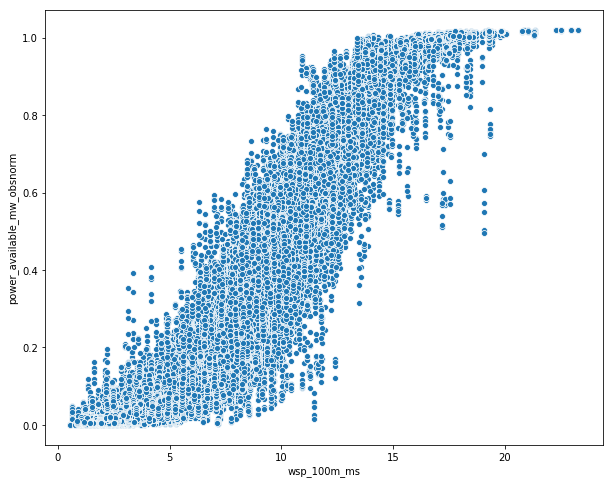

In [372]:
plt.figure(figsize=(10,8))
#sns.scatterplot(x='power_available_mw_obsnorm', y='target_losses_norm', hue=loaded1.index.month, data=loaded1)
sns.scatterplot(x='wsp_100m_ms', y='power_available_mw_obsnorm', 
                #data=loaded_join[loaded1.index.month.isin([11,12])])
                data=loaded_join)
plt.show()

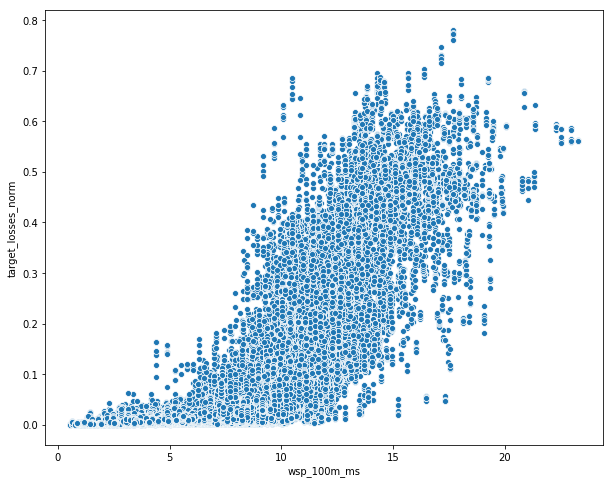

In [373]:
plt.figure(figsize=(10,8))
#sns.scatterplot(x='power_available_mw_obsnorm', y='target_losses_norm', hue=loaded1.index.month, data=loaded1)
sns.scatterplot(x='wsp_100m_ms', y='target_losses_norm', 
                #data=loaded_join[loaded1.index.month.isin([11,12])])
                data=loaded_join)
plt.show()

In [400]:
loaded_join2 = loaded_join.dropna()

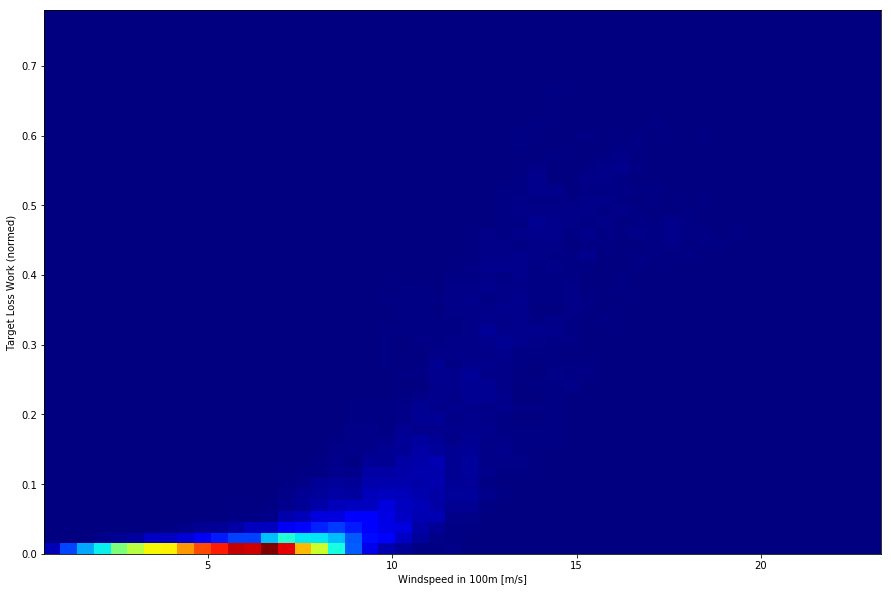

In [402]:
plt.subplots(figsize=(15,10))
plt.hist2d(loaded_join2['wsp_100m_ms'], loaded_join2['target_losses_norm'], bins=50, cmap=plt.cm.jet)
#plt.xlim(0, 4000)
#plt.ylim(0.1, 1.0)
plt.xlabel('Windspeed in 100m [m/s]')
plt.ylabel('Target Loss Work (normed)')
plt.show()

In [396]:
loaded_join3 = loaded_join2[loaded_join2.target_losses_norm > 0.1]

In [397]:
#loaded_join.target_losses_norm.value_counts(ascending=False)
loaded_join3[:10]

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 06:00:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894,0.561235,0.933616,0.372381
2018-01-01 06:10:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894,0.512618,0.958089,0.445471
2018-01-01 06:20:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894,0.494356,0.966840,0.472484
2018-01-01 06:30:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894,0.484470,0.970603,0.486133
2018-01-01 06:40:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353,0.509116,0.983485,0.474370
2018-01-01 06:50:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353,0.513224,0.988892,0.475668
2018-01-01 07:00:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353,0.443089,0.989338,0.546249
2018-01-01 07:10:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353,0.445928,0.976663,0.530735
2018-01-01 07:20:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353,0.438881,0.985819,0.546937
2018-01-01 07:30:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353,0.420594,0.975629,0.555035


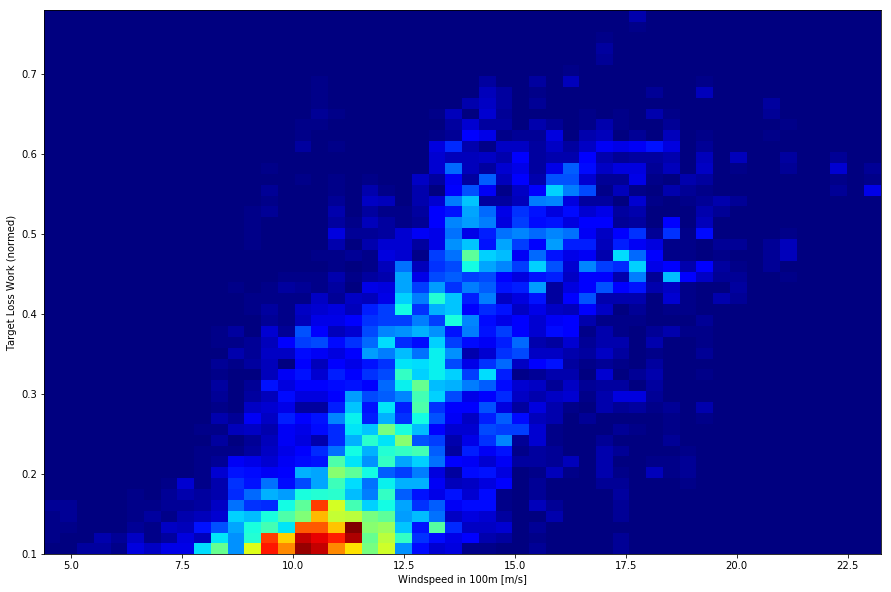

In [398]:
plt.subplots(figsize=(15,10))
plt.hist2d(loaded_join3['wsp_100m_ms'], loaded_join3['target_losses_norm'], bins=50, cmap=plt.cm.jet)
#plt.xlim(0, 4000)
#plt.ylim(0.1, 1.0)
plt.xlabel('Windspeed in 100m [m/s]')
plt.ylabel('Target Loss Work (normed)')
plt.show()

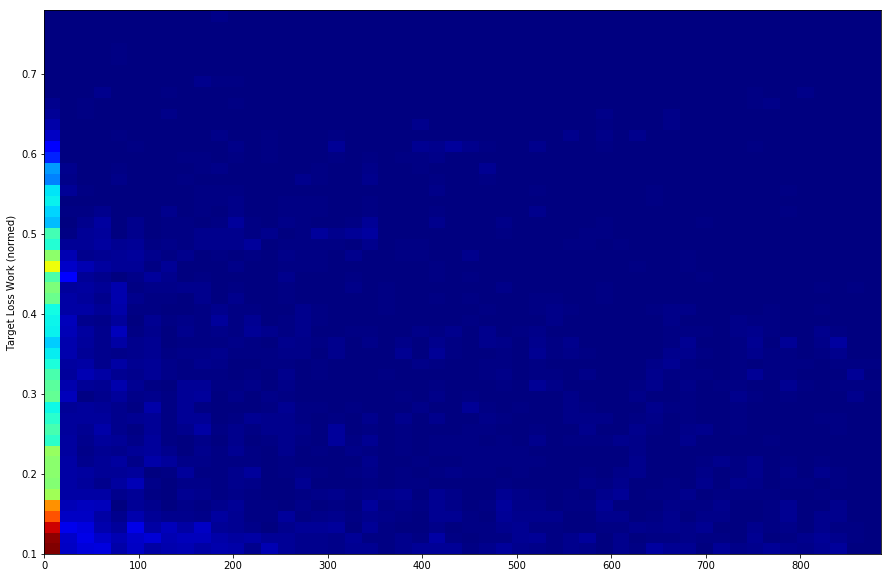

In [420]:
plt.subplots(figsize=(15,10))
plt.hist2d(loaded_join3['dswrf_sfc_wm2'], loaded_join3['target_losses_norm'], bins=50, cmap=plt.cm.jet)
#plt.xlim(0, 4000)
#plt.ylim(0.1, 1.0)
#plt.xlabel('Windspeed in 100m [m/s]')
plt.ylabel('Target Loss Work (normed)')
plt.show()

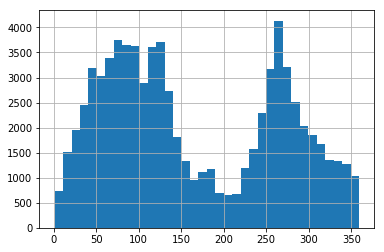

In [427]:
loaded_join.wdir_100m_dn.hist(bins=36)
plt.show()

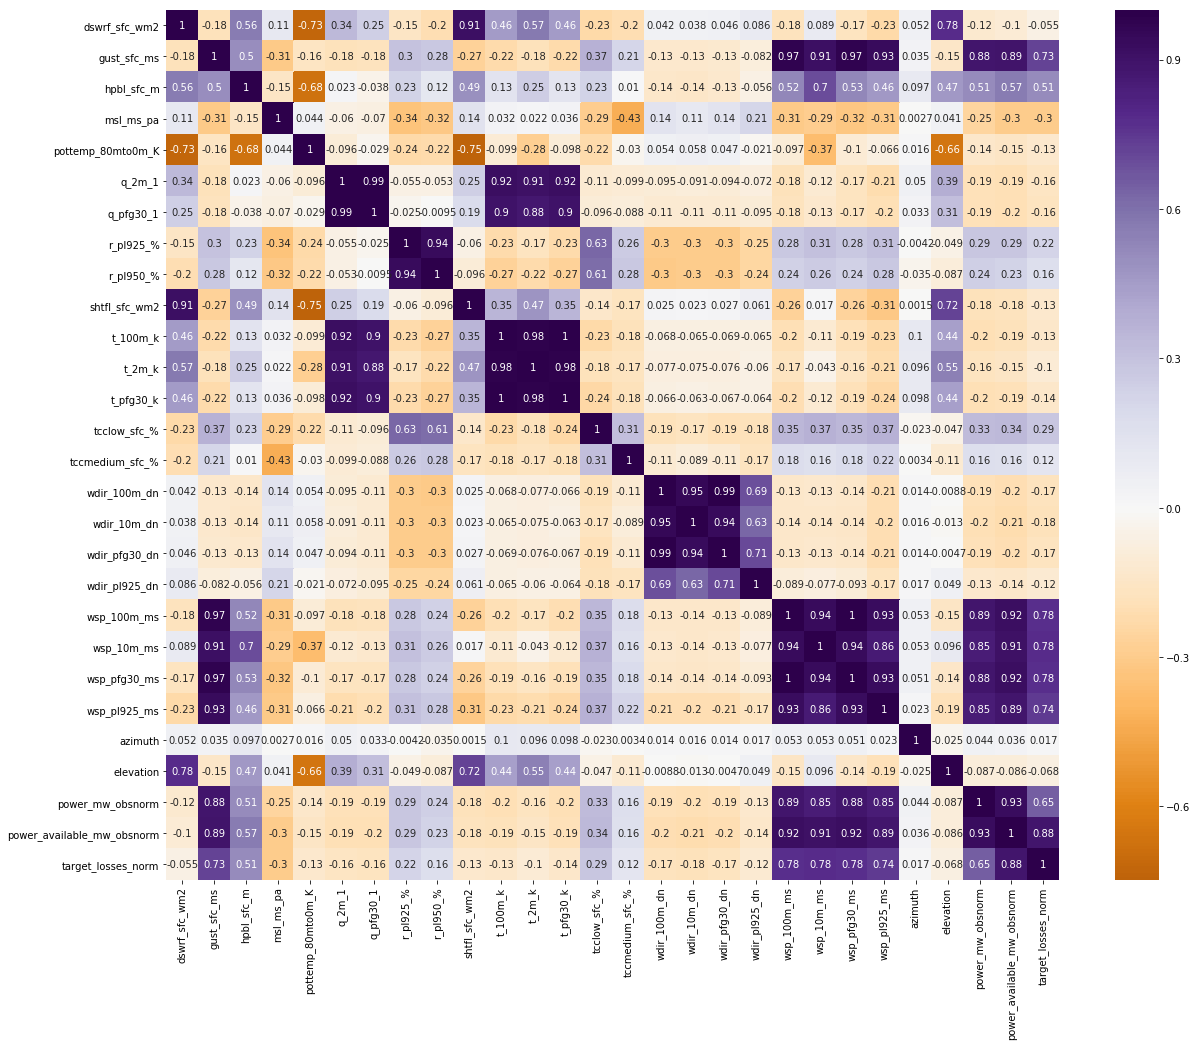

In [426]:
corr_mat1 = loaded_join.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corr_mat1, cmap='PuOr', center=0.0, annot=True)
plt.show()

In [448]:
nan1 = np.nan
nan1
nan1 is np.nan


True

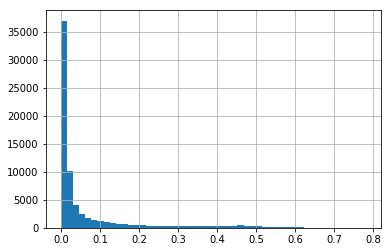

In [455]:
loaded_join.target_losses_norm.hist(bins=50)
plt.show()

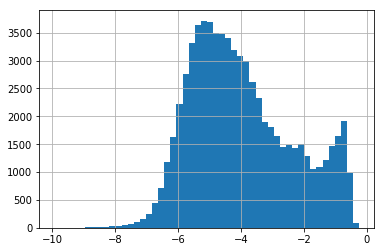

In [454]:
np.log(loaded_join.target_losses_norm).hist(bins=50)
plt.show()

In [456]:
loaded_join.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77724 entries, 2018-01-01 06:00:00+00:00 to 2019-06-24 23:50:00+00:00
Freq: 10T
Data columns (total 29 columns):
dswrf_sfc_wm2                 77224 non-null float64
gust_sfc_ms                   77224 non-null float64
hpbl_sfc_m                    77224 non-null float64
msl_ms_pa                     77224 non-null float64
pottemp_80mto0m_K             77224 non-null float64
q_2m_1                        77224 non-null float64
q_pfg30_1                     77224 non-null float64
r_pl925_%                     77224 non-null float64
r_pl950_%                     77224 non-null float64
shtfl_sfc_wm2                 77224 non-null float64
t_100m_k                      77224 non-null float64
t_2m_k                        77224 non-null float64
t_pfg30_k                     77224 non-null float64
tcclow_sfc_%                  77224 non-null float64
tccmedium_sfc_%               77224 non-null float64
wdir_100m_dn                  77224 non

In [475]:
loaded_join.columns

Index(['dswrf_sfc_wm2', 'gust_sfc_ms', 'hpbl_sfc_m', 'msl_ms_pa',
       'pottemp_80mto0m_K', 'q_2m_1', 'q_pfg30_1', 'r_pl925_%', 'r_pl950_%',
       'shtfl_sfc_wm2', 't_100m_k', 't_2m_k', 't_pfg30_k', 'tcclow_sfc_%',
       'tccmedium_sfc_%', 'wdir_100m_dn', 'wdir_10m_dn', 'wdir_pfg30_dn',
       'wdir_pl925_dn', 'wsp_100m_ms', 'wsp_10m_ms', 'wsp_pfg30_ms',
       'wsp_pl925_ms', 'created_on', 'azimuth', 'elevation',
       'power_mw_obsnorm', 'power_available_mw_obsnorm', 'target_losses_norm'],
      dtype='object')

In [477]:
loaded_join.rename(columns={'r_pl925_%': 'r_pl925_perc',
                            'r_pl950_%': 'r_pl950_perc',
                            'tcclow_sfc_%': 'tcclow_sfc_perc',
                            'tccmedium_sfc_%': 'tccmedium_sfc_perc'}, inplace=True)
loaded_join.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77724 entries, 2018-01-01 06:00:00+00:00 to 2019-06-24 23:50:00+00:00
Freq: 10T
Data columns (total 29 columns):
dswrf_sfc_wm2                 77224 non-null float64
gust_sfc_ms                   77224 non-null float64
hpbl_sfc_m                    77224 non-null float64
msl_ms_pa                     77224 non-null float64
pottemp_80mto0m_K             77224 non-null float64
q_2m_1                        77224 non-null float64
q_pfg30_1                     77224 non-null float64
r_pl925_perc                  77224 non-null float64
r_pl950_perc                  77224 non-null float64
shtfl_sfc_wm2                 77224 non-null float64
t_100m_k                      77224 non-null float64
t_2m_k                        77224 non-null float64
t_pfg30_k                     77224 non-null float64
tcclow_sfc_perc               77224 non-null float64
tccmedium_sfc_perc            77224 non-null float64
wdir_100m_dn                  77224 non

In [493]:
import statsmodels.api as sms
import statsmodels.formula.api as smf

cols = loaded_join.columns

r_squared_adj_list = []

for i in range(len(cols)):
    
    form1 = 'target_losses_norm ~ ' + str(cols[i])


    model1 = smf.ols(data=loaded_join, formula=form1)
    results1 = model1.fit()
    #results1.summary()
    #print(str(cols[i]) + ' R_squared_adj: + ' + str(results1.rsquared_adj))
    r_squared_adj_list.append((cols[i], results1.rsquared_adj))

In [494]:
from operator import itemgetter
sorted(r_squared_adj_list, key=itemgetter(1), reverse=True) 

[('target_losses_norm', 1.0),
 ('created_on', 0.9216469004888264),
 ('power_available_mw_obsnorm', 0.7794446351791603),
 ('wsp_10m_ms', 0.6112666927673487),
 ('wsp_100m_ms', 0.6062051395997752),
 ('wsp_pfg30_ms', 0.6054584282985553),
 ('wsp_pl925_ms', 0.5534620975981248),
 ('gust_sfc_ms', 0.5258621490738299),
 ('power_mw_obsnorm', 0.4166933518930276),
 ('hpbl_sfc_m', 0.2636635897740315),
 ('msl_ms_pa', 0.08952863511554432),
 ('tcclow_sfc_perc', 0.0822245592819062),
 ('r_pl925_perc', 0.05039466765014067),
 ('wdir_10m_dn', 0.03282780009490516),
 ('wdir_100m_dn', 0.030361223052251862),
 ('wdir_pfg30_dn', 0.02960482266247666),
 ('r_pl950_perc', 0.026841990085968437),
 ('q_pfg30_1', 0.025907052646562012),
 ('q_2m_1', 0.02441327252422054),
 ('t_pfg30_k', 0.01878442533065139),
 ('t_100m_k', 0.018024631238886535),
 ('shtfl_sfc_wm2', 0.0171495118902113),
 ('pottemp_80mto0m_K', 0.01637337007290607),
 ('tccmedium_sfc_perc', 0.015529712492334924),
 ('wdir_pl925_dn', 0.013864061262829797),
 ('t_2m_

In [507]:
#form2 = 'target_losses_norm ~ wsp_10m_ms + wsp_100m_ms + wsp_pfg30_ms + wsp_pl925_ms + gust_sfc_ms + hpbl_sfc_m'
form2 = 'target_losses_norm ~ wsp_10m_ms + wsp_100m_ms + + wsp_pfg30_ms + wsp_pl925_ms + gust_sfc_ms'

model2 = smf.ols(data=loaded_join, formula=form2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     target_losses_norm   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 2.769e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:42:28   Log-Likelihood:                 82598.
No. Observations:               70187   AIC:                        -1.652e+05
Df Residuals:                   70181   BIC:                        -1.651e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1654      0.001   -226.041      0.000      -0.167      -0.164
wsp_10m_ms       0.0297      0.000     72.150      0.000       0.029       0.030
wsp_100m_ms      0.0496      0.002     24.380      0.000       0.046       0.054
wsp_pfg30_ms    -0.0219      0.002    -10.410      0.000      -0.026      -0.018
wsp_pl925_ms     0.0092      0.000     59.206      0.000       0.009       0.009
gust_sfc_ms     -0.0251      0.000    -79.507      0.000      -0.026      -0.025
==============================================================================
Omnibus:                    15155.894   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43793.599
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       6.134   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
#from imblearn.under_sampling import RandomUnderSampler
#from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
#import time

In [513]:
loaded_join.isnull().sum().sort_values(ascending = False)

target_losses_norm            7056
power_mw_obsnorm              7056
power_available_mw_obsnorm    7056
t_pfg30_k                      500
gust_sfc_ms                    500
hpbl_sfc_m                     500
msl_ms_pa                      500
pottemp_80mto0m_K              500
q_2m_1                         500
q_pfg30_1                      500
r_pl925_perc                   500
r_pl950_perc                   500
shtfl_sfc_wm2                  500
t_100m_k                       500
t_2m_k                         500
tccmedium_sfc_perc             500
tcclow_sfc_perc                500
wdir_100m_dn                   500
wdir_10m_dn                    500
wdir_pfg30_dn                  500
wdir_pl925_dn                  500
wsp_100m_ms                    500
wsp_10m_ms                     500
wsp_pfg30_ms                   500
wsp_pl925_ms                   500
created_on                     500
azimuth                        500
elevation                      500
dswrf_sfc_wm2       

In [514]:
loaded2.isnull().sum().sort_values(ascending = False)

elevation            0
azimuth              0
gust_sfc_ms          0
hpbl_sfc_m           0
msl_ms_pa            0
pottemp_80mto0m_K    0
q_2m_1               0
q_pfg30_1            0
r_pl925_%            0
r_pl950_%            0
shtfl_sfc_wm2        0
t_100m_k             0
t_2m_k               0
t_pfg30_k            0
tcclow_sfc_%         0
tccmedium_sfc_%      0
wdir_100m_dn         0
wdir_10m_dn          0
wdir_pfg30_dn        0
wdir_pl925_dn        0
wsp_100m_ms          0
wsp_10m_ms           0
wsp_pfg30_ms         0
wsp_pl925_ms         0
created_on           0
dswrf_sfc_wm2        0
dtype: int64

In [524]:
loaded_join[loaded_join.wsp_10m_ms.isnull()][-20:]

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,...,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2019-05-04 02:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213286,0.279691,0.066405
2019-05-04 02:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.281249,0.341630,0.060380
2019-05-04 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277171,0.319870,0.042699
2019-05-04 03:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.273737,0.319945,0.046208
2019-05-04 03:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.249526,0.274838,0.025312
2019-05-04 03:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240906,0.256676,0.015770
2019-05-04 03:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227585,0.245039,0.017454
2019-05-04 03:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282189,0.308381,0.026192
2019-05-04 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.294647,0.314702,0.020056
2019-05-04 04:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259240,0.310221,0.050980


In [523]:
loaded2['2019-04-30']

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
index,,,,,,,,,,,,,,,,,,,,,
2019-04-30 00:00:00+00:00,1.50,2.258750,33.181162,102260.07500,3.386345,0.004413,0.004121,78.975000,69.600000,-35.808350,...,231.088028,236.424921,221.241315,3.754380,1.755993,3.718725,5.771832,2019-04-27 18:00:00+00:00,11.359437,-24.284307
2019-04-30 01:00:00+00:00,0.00,2.025000,27.785576,102229.37500,3.414010,0.004225,0.004016,80.625000,72.275000,-34.871143,...,221.940093,227.147915,213.563921,3.275007,1.570453,3.253839,5.600981,2019-04-27 18:00:00+00:00,26.716024,-21.203224
2019-04-30 02:00:00+00:00,0.00,1.892024,24.616643,102211.58750,3.387217,0.004123,0.003996,82.100000,74.775000,-33.425928,...,218.779003,221.244698,207.397764,2.933174,1.452309,2.926020,5.509484,2019-04-27 18:00:00+00:00,40.969208,-15.956253
2019-04-30 03:00:00+00:00,0.00,1.713208,22.833601,102205.61250,3.636200,0.004075,0.004022,82.575000,77.125000,-32.218567,...,211.633670,213.503029,201.753341,2.607048,1.304676,2.613299,5.485256,2019-04-27 18:00:00+00:00,54.002861,-9.021116
2019-04-30 04:00:00+00:00,0.00,1.450163,22.233828,102202.82500,3.543032,0.004068,0.004091,81.950000,79.125000,-30.065417,...,205.138170,205.176317,196.931594,2.252167,1.153622,2.275446,5.466517,2019-04-27 18:00:00+00:00,66.034966,-0.878584
2019-04-30 05:00:00+00:00,47.50,1.356836,23.450669,102203.43750,2.055367,0.004548,0.004230,79.950000,80.050000,-20.507568,...,198.530734,196.157407,194.428039,2.017315,1.053694,2.057200,5.483545,2019-04-27 18:00:00+00:00,77.878937,8.372897
2019-04-30 06:00:00+00:00,180.50,1.183948,83.199766,102202.15625,0.228296,0.005010,0.004551,76.100000,79.625000,6.353638,...,186.329332,181.860202,193.058927,1.647042,0.883608,1.705760,5.342644,2019-04-27 18:00:00+00:00,89.258858,17.706749
2019-04-30 07:00:00+00:00,327.50,1.569104,237.269165,102195.73750,-0.598612,0.005483,0.005046,71.675000,78.125000,47.973419,...,147.832315,157.973323,191.184743,1.362665,1.059276,1.404178,4.855530,2019-04-27 18:00:00+00:00,101.236481,27.060232
2019-04-30 08:00:00+00:00,482.50,2.002562,393.707273,102183.87500,-0.667608,0.006103,0.005604,69.600000,77.900000,102.168732,...,149.060988,152.351465,188.370703,1.683403,1.455406,1.678626,4.563270,2019-04-27 18:00:00+00:00,114.636360,36.000080
